# Selenium 활용 목적

* BeautifulSoup등을 활용한 일반적인 웹스크래핑 기술로 접근 불가능한 아래 데이터에 대한 접근 가능
    * JavaScript로 동적으로 생성되는 HTML 코드
    * HTML의 요소간 여러번의 클릭을 해야 조회되는 HTML 요소

In [1]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium import webdriver
from bs4 import BeautifulSoup
import os

In [2]:
# pip install selenium
# pip install webdriver_manager

In [3]:
# BeautifulSoup에서 보이지 않는 동적인 html 요소를 포함한 페이지
url = 'https://finance.naver.com/'
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()
driver.implicitly_wait(3) 

<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36"><head>


	
	
		
			
				<title>네이버페이 증권</title>
			
			
		
	




<meta http-equiv="Content-Type" content="text/html; charset=utf-8">

<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta name="apple-mobile-web-app-title" content="네이버페이 증권">





	
		<meta property="og:title" content="네이버페이 증권">
		<meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png">
		<meta property="og:url" content="https://finance.naver.com">
		<meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공">
    
    

<meta property="og:type" content="article">
<meta property="og:article:thumbnailUrl" content="">
<meta property="og:article:author" content="네이버페이 증권">
<meta property="og:article:author:url" content="http://FINANCE.NAVER.
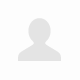
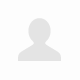

In [4]:
driver.get(url)
driver.implicitly_wait(3) 
html = driver.page_source

print(html)
driver.close()

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36" lang="ko"><head>
<title>네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버페이 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버페이 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<meta content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버페이 증권" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstoc
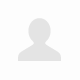
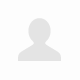

In [5]:
soup=BeautifulSoup(html,'html.parser')
print(soup)

In [6]:
from datetime import datetime
current_date = datetime.now().strftime('%y-%m-%d')
current_date
file_path = f'네이버증시_{current_date}.html'
if not os.path.exists(file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(str(soup))
        print("HTML 파일이 저장되었습니다.")

HTML 파일이 저장되었습니다.
